# **Time Series Forecasting**

Time series forecasting is an essential technique in data science and machine learning, allowing us to predict future values based on past observations. Time series data typically consists of sequences of data points, measured at regular intervals over time, such as daily stock prices, hourly weather conditions, or monthly sales figures. Analyzing and forecasting such data is crucial in many industries, helping businesses and researchers make informed decisions, optimize resources, and manage risks.

This notebook presents my solution to the **Visualizing Time Series Data** assignment from the **Time Series Lesson** in Microsoft’s [ML for Beginners](https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/1-Introduction/assignment.md) course. The assignment focuses on exploring and understanding time series data through visualizations, identifying key features such as trends, seasonality, and abrupt changes, which are critical in building accurate forecasting models.


### **Objectives**:
1. Load and explore three time series datasets.
2. Visualize each dataset to uncover its underlying patterns and characteristics.
3. Identify and document any trends, seasonality, or abrupt changes present in the data.

The datasets explored in this notebook are sourced from Kaggle, covering areas like air quality, retail sales, and unemployment rates. By understanding the special features of each dataset, we set the stage for applying various forecasting techniques in future steps.


# Importing libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis: Coffee Sales

**Loading the Dataset**

In [39]:
URL_coffee = "https://github.com/Kofoworola13/DSS/raw/main/datasets/Coffee%20Sales.csv"

coffee_df = pd.read_csv(URL_coffee)
coffee_df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [40]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


**Summary**

The **Coffee Sales Dataset** contains 6 columns and 1,464 instances. Although there are missing values in the `card` column, I will not be focusing on it, as it is not relevant to my analysis. The key columns for this time series visualization are `datetime` and `money`.

Since there are two date-related columns (`date` and `datetime`), I will use the `datetime` column for my analysis, as it contains both date and time information. I will convert this column into a proper datetime format to facilitate analysis. The `money` column will be used to represent the sales over time, allowing us to observe trends, seasonality, or abrupt changes in coffee sales.


**1. Convert the `datetime` Column**

In [41]:
# Convert 'datetime' to datetime format for time series analysis
coffee_df['datetime'] = pd.to_datetime(coffee_df['datetime'])

# Set 'datetime' as the index for easier plotting and analysis
coffee_df.set_index('datetime', inplace=True)

# Check the first few rows again
coffee_df.head()

,date,cash_type,card,money,coffee_name
datetime,,,,,
2024-03-01 10:15:50.520,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte
2024-03-01 12:19:22.539,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2024-03-01 12:20:18.089,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2024-03-01 13:46:33.006,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano
2024-03-01 13:48:14.626,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte


**2. Visualize Coffee Sales (money)**

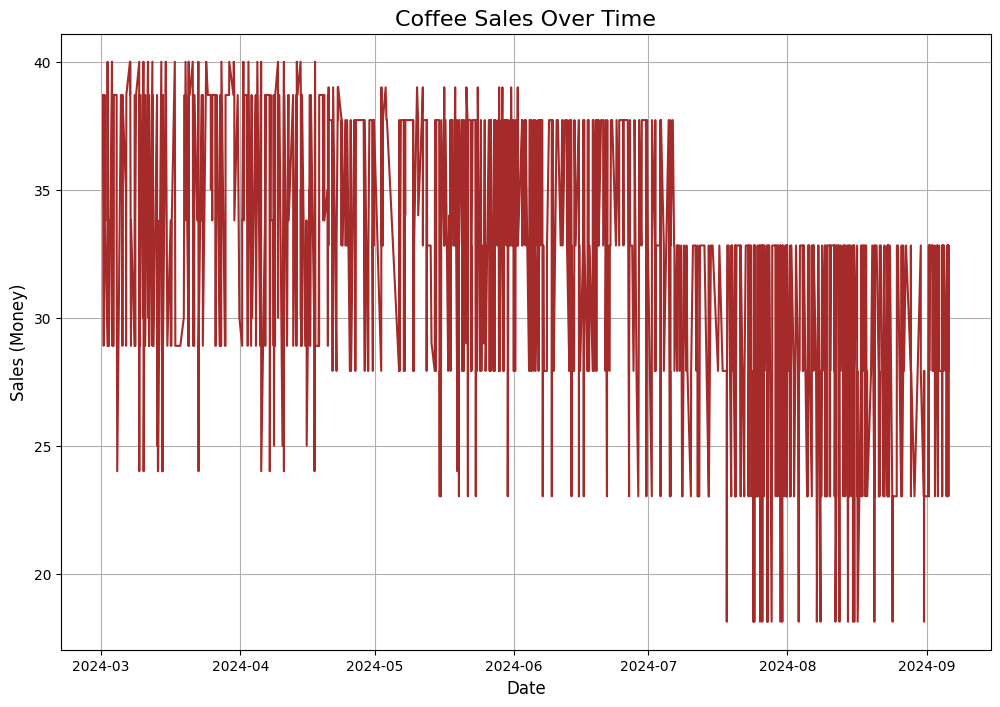

In [42]:
# Plot the sales data ('money') over time
plt.figure(figsize=(12, 8))
plt.plot(coffee_df['money'], color='brown')
plt.title('Coffee Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (Money)', fontsize=12)
plt.grid(True)
plt.show()

**Main Observations**

1. **Downward Trend**: Sales appear to be gradually decreasing over time. Initially, the upper bound of sales is around 40, but by the later months, the maximum value decreases to about 30.

2. **Frequent Fluctuations**: There are constant fluctuations in sales values throughout the entire time series. The sales range between approximately 25 and 40 in the earlier periods and between 20 and 35 in later months.

3. **Abrupt Changes**: There are frequent sharp drops in sales, with sudden dips occurring consistently across the dataset. These abrupt changes could be due to factors such as low-demand days or external events affecting sales.

4. **No Clear Seasonality**: The plot does not show any obvious repeating patterns, so there doesn't seem to be clear seasonality (e.g., monthly or weekly cycles).

5. **Increased Variability Over Time**: As time progresses, the range between peaks and troughs seems to narrow slightly, indicating reduced variability in sales, though fluctuations are still significant.


**Possible Hypotheses:**

- The downward trend could indicate decreasing demand for coffee, potentially due to external factors like economic conditions, competition, or seasonal effects.

- The frequent spikes and dips suggest that sales are highly volatile, possibly due to varying customer foot traffic or daily promotions that temporarily boost or lower sales.

- If there were major events, such as a price change or a store policy change, this could explain the general decline in sales over time.

# Time Series Analysis: Air Quality Index

In [43]:
URL_AQI = "https://github.com/Kofoworola13/DSS/raw/main/datasets/sector_51_daily_aqi.csv"

AQI_df = pd.read_csv(URL_AQI)
AQI_df.head()

,Unnamed: 0,Date,AQI
0,0,2020-03-05,73.0
1,1,2020-03-06,55.0
2,2,2020-03-07,78.0
3,3,2020-03-08,120.0
4,4,2020-03-09,179.0


In [44]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1652 non-null   int64  
 1   Date        1652 non-null   object 
 2   AQI         1650 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.8+ KB


The **Air Quality Index (AQI) Dataset** contains 3 columns and 1652 instances.

**Steps for Analysis:**
1. **Drop the unnecessary index column** (`Unnamed: 0`).
2. **Convert the `Date` column to `datetime` format** to properly handle time-related operations.
3. **Handle the missing values** in the `AQI` column by dropping them.
4. **Plot the AQI values over time** to observe trends, seasonality, or abrupt changes.


In [45]:
# Dropping the Unnamed column
AQI_df = AQI_df.drop(columns=['Unnamed: 0'])

In [46]:
# Convert 'Date' to datetime format for time series analysis
AQI_df['Date'] = pd.to_datetime(AQI_df['Date'])

In [47]:
# Dropping the missing values
AQI_df = AQI_df.dropna()

In [48]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1650 entries, 0 to 1651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1650 non-null   datetime64[ns]
 1   AQI     1650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.7 KB


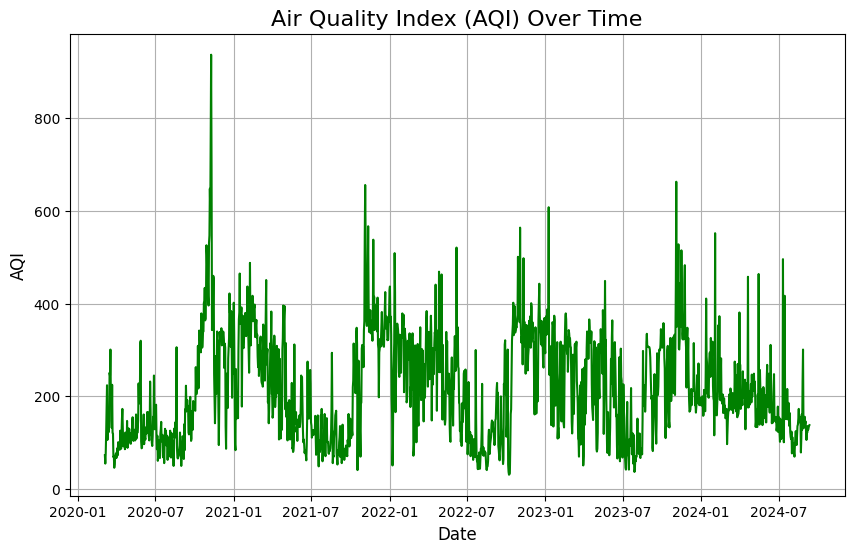

In [57]:
# Plot AQI values over time
plt.figure(figsize=(10, 6))
plt.plot(AQI_df['Date'], AQI_df['AQI'], color='green')
plt.title('Air Quality Index (AQI) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True)
plt.show()

**Main Observations**

Looking at the Air Quality Index (AQI) plot, here are some observations:

1. **Fluctuations in AQI**: The plot shows frequent and significant fluctuations in AQI values over time, indicating variability in air quality. There are times when AQI spikes sharply, particularly around early 2021 and mid-2022.

2. **Seasonality**: There seems to be a cyclical pattern where AQI values rise and fall periodically. This may indicate seasonality, where air quality worsens or improves depending on the time of year.

3. **Spikes**: There are noticeable spikes, particularly around early 2021, where AQI values exceed 800, which indicates severe air pollution. These abrupt increases may be caused by specific events like fires, industrial activity, or other factors affecting air quality.

4. **Recent Downtrend**: Toward the right of the graph (2024), AQI values show a slight downtrend, potentially indicating an improvement in air quality in the most recent period.

5. **Noise**: The AQI data appears to be quite noisy, with rapid fluctuations in short time intervals. This may suggest localized or short-term events affecting air quality.

In summary, this time series data shows clear evidence of seasonality and abrupt spikes in AQI, with a potential long-term trend of improving air quality toward the most recent dates.

# Time Series Analysis: Unemployment Rates by Age Groups

In [50]:
URL_unemployment = "https://github.com/Kofoworola13/DSS/raw/main/datasets/unemployment_rate_by_age_groups.csv"

unemployment_df = pd.read_csv(URL_unemployment)
unemployment_df.head()

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,State,California,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,State,California,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,State,California,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,State,California,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [51]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area Type  194 non-null    object 
 1   Area Name  194 non-null    object 
 2   Date       194 non-null    object 
 3   Year       194 non-null    int64  
 4   Month      194 non-null    object 
 5   Age 16-19  194 non-null    float64
 6   Age 20-24  194 non-null    float64
 7   Age 25-34  194 non-null    float64
 8   Age 35-44  194 non-null    float64
 9   Age 45-54  194 non-null    float64
 10  Age 55-64  194 non-null    float64
 11  Age 65+    194 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 18.3+ KB


In this dataset, there are 12 columns with 194 instances. There are no missing values in the dataset, and each column is well-formatted.
The relevant columns for analysis are:

- `Date`
- Unemployment rates across different age groups: `Age 16-19`, `Age 20-24`, `Age 25-34`, `Age 35-44`, `Age 45-54`, `Age 55-64`, `Age 65+`

I will focus on analyzing patterns in unemployment rates across these age groups over time. This analysis aims to identify trends, seasonal patterns, and variations in unemployment rates across different age demographics.

In [52]:
# Convert the 'Date' column to datetime for time-based analysis
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

# Set 'Date' as the index for easier visualization of unemployment trends
unemployment_df.set_index('Date', inplace=True)

In [53]:
unemployment_df.head()

,Area Type,Area Name,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
Date,,,,,,,,,,,
2008-02-01,State,California,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
2008-03-01,State,California,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2008-04-01,State,California,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
2008-05-01,State,California,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
2008-06-01,State,California,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


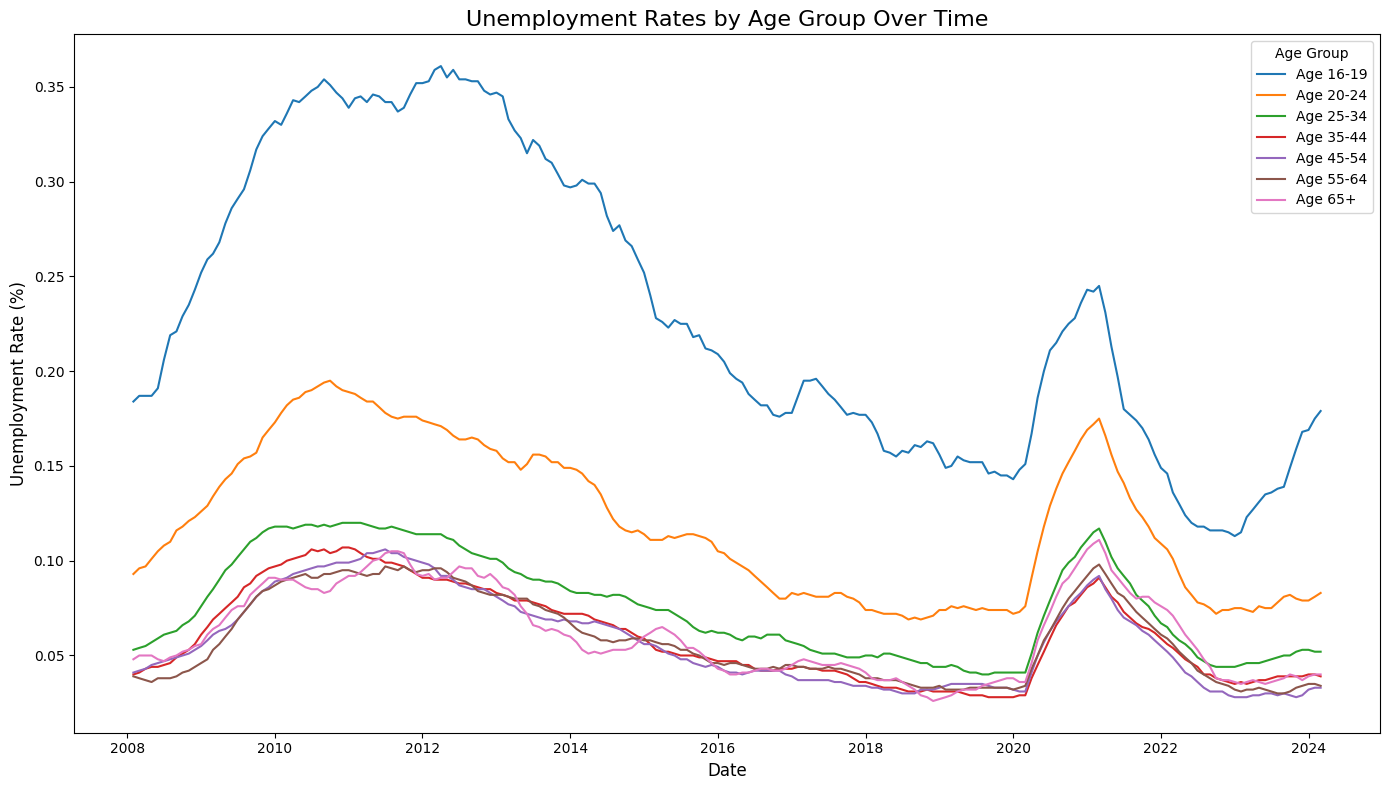

In [54]:
plt.figure(figsize=(14, 8))
# Plot each age group's unemployment rate over time
for column in unemployment_df.columns[4:]:
    plt.plot(unemployment_df.index, unemployment_df[column], label=column)

plt.title('Unemployment Rates by Age Group Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend(title='Age Group')
plt.tight_layout()

plt.show()

**Main Observations:**

1. **Overall Trend:** The general trend across all age groups is a gradual decline in unemployment rates from 2008 to around 2016, followed by a slight increase until 2020. After 2020, there's a sharp spike in unemployment rates, particularly for younger age groups, likely due to the COVID-19 pandemic.
2. **Age Group Variations:**
    - **Younger Age Groups (16-24, 25-34):** These groups consistently experience higher unemployment rates than older age groups throughout the entire period. They were particularly hard-hit during the economic downturn of 2008-2010 and the COVID-19 pandemic.
    - **Older Age Groups (55-64, 65+):** These groups generally have lower unemployment rates compared to younger age groups. However, they also experienced a significant increase in unemployment during the COVID-19 pandemic.
    - **Mid-Age Groups (35-44, 45-54):** These groups fall somewhere between the younger and older age groups in terms of unemployment rates. They experienced moderate fluctuations throughout the period.

3. **Seasonality**: The plot does not exhibit any strong seasonal fluctuations. This suggests that the unemployment rates for different age groups are not significantly influenced by seasonal factors such as holidays or weather patterns.    
4. **Abrupt Changes:** The plot reflects the impact of major economic events, such as the Great Recession of 2008-2010 and the COVID-19 pandemic. These events led to significant spikes in unemployment rates across all age groups.
5. **Economic Recovery:** In the years following the economic downturn and the pandemic, unemployment rates have been gradually declining, indicating a recovery in the labor market.

In summary, the plot reveals that unemployment rates have been historically higher for younger age groups, but the COVID-19 pandemic had a significant impact on all age groups. While there has been a general recovery in recent years, younger individuals continue to face higher unemployment challenges.


# Conclusion

This notebook explores three time series datasets—coffee sales, air quality index, and unemployment rates by age group. Key findings include:

1. **Coffee Sales**: A gradual decline in sales with frequent fluctuations, but no clear seasonality.
2. **Air Quality Index**: Significant fluctuations with some seasonality and a recent improvement in air quality.
3. **Unemployment Rates**: Higher rates for younger age groups, especially during the 2008 recession and the 2020 pandemic, with no strong seasonality.

Overall, this analysis demonstrates the importance of visualizing time series data to identify trends, seasonality, and other patterns that can inform further analysis and forecasting.